##### <html><h><font color='purple'>Loading and Organizing Data from CIFAR10

In [23]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)


In [5]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
print('Noof classes:',K)
print('Noof training images:',Ntr)
print('Noof test images:',Nte)
print('Noof features:',Din)
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

Noof classes: 10
Noof training images: 50000
Noof test images: 10000
Noof features: 3072


In [6]:
print('original labels:',y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
print('labels in class matrix:',y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

original labels: (50000, 1)
labels in class matrix: (50000, 10)


In [7]:
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train: (50000, 3072)
x_test: (10000, 3072)


##### <html><h><font color='purple'>Linear Classifier

In [8]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print('w1:',w1)

w1: (3072, 10)
b1: (10,)
w1: [[-7.59576426e-06  5.41824394e-06 -1.66349023e-05 ... -2.91361361e-07
   3.22799687e-06  5.46653375e-06]
 [ 3.03914697e-06  2.68623339e-07 -1.18623451e-05 ... -2.33543712e-06
   3.30439312e-06 -1.36377986e-05]
 [-6.62541727e-06  6.82511467e-06  2.85693877e-05 ... -5.42683448e-06
  -1.66591312e-05 -3.91855502e-06]
 ...
 [ 1.55443981e-06 -2.79405360e-07 -8.97743444e-06 ... -2.06256080e-06
   7.07649571e-06  7.78791288e-07]
 [-4.69833321e-06 -9.44062045e-06 -4.34944763e-06 ...  3.44535394e-07
  -1.03361064e-05 -7.23887208e-06]
 [ 5.18651022e-06 -1.03341562e-05 -1.14136382e-05 ...  9.55466543e-06
   8.36649791e-06 -1.53299606e-05]]


In [9]:
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1) + b1
    y_pred_test=x_test.dot(w1)+b1
    #classes=np.argmax(prediction,axis=1)
    #prediction=y_pred(classes)
    #classes=np.reshape(classes,(Ntr,1))
    #classes=tf.keras.utils.to_categorical(classes, num_classes=K)
    
    loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1)
    test_loss=1./Nte*(np.square(y_pred_test-y_test)).sum() + reg * np.sum(w1*w1)
    train_loss_history.append(loss)
    test_loss_history.append(test_loss)

    train_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    test_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum()
    test_acc_history.append(test_acc)

    if t%10==0:
        print('epoch %d/%d: train loss= %f-- ,test loss= %f--,train accuracy= %f--, test accuracy= %f' % (t,iterations,loss,test_loss,train_acc,test_acc))

        
    # Backward pass

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg * w1
    db1=dy_pred.sum(axis=0)
    #db1=np.reshape(db1,(K))
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay






epoch 0/300: train loss= 1.000010-- ,test loss= 1.000012--,train accuracy= 0.670890--, test accuracy= 0.667870
epoch 10/300: train loss= 0.876638-- ,test loss= 0.876237--,train accuracy= 0.756514--, test accuracy= 0.758140
epoch 20/300: train loss= 0.842540-- ,test loss= 0.842417--,train accuracy= 0.762646--, test accuracy= 0.767930
epoch 30/300: train loss= 0.823616-- ,test loss= 0.823714--,train accuracy= 0.766532--, test accuracy= 0.770570
epoch 40/300: train loss= 0.812388-- ,test loss= 0.812706--,train accuracy= 0.768666--, test accuracy= 0.771460
epoch 50/300: train loss= 0.805425-- ,test loss= 0.805969--,train accuracy= 0.770260--, test accuracy= 0.772920
epoch 60/300: train loss= 0.800905-- ,test loss= 0.801678--,train accuracy= 0.771546--, test accuracy= 0.773410
epoch 70/300: train loss= 0.797820-- ,test loss= 0.798823--,train accuracy= 0.772662--, test accuracy= 0.773590
epoch 80/300: train loss= 0.795604-- ,test loss= 0.796833--,train accuracy= 0.773810--, test accuracy= 0.

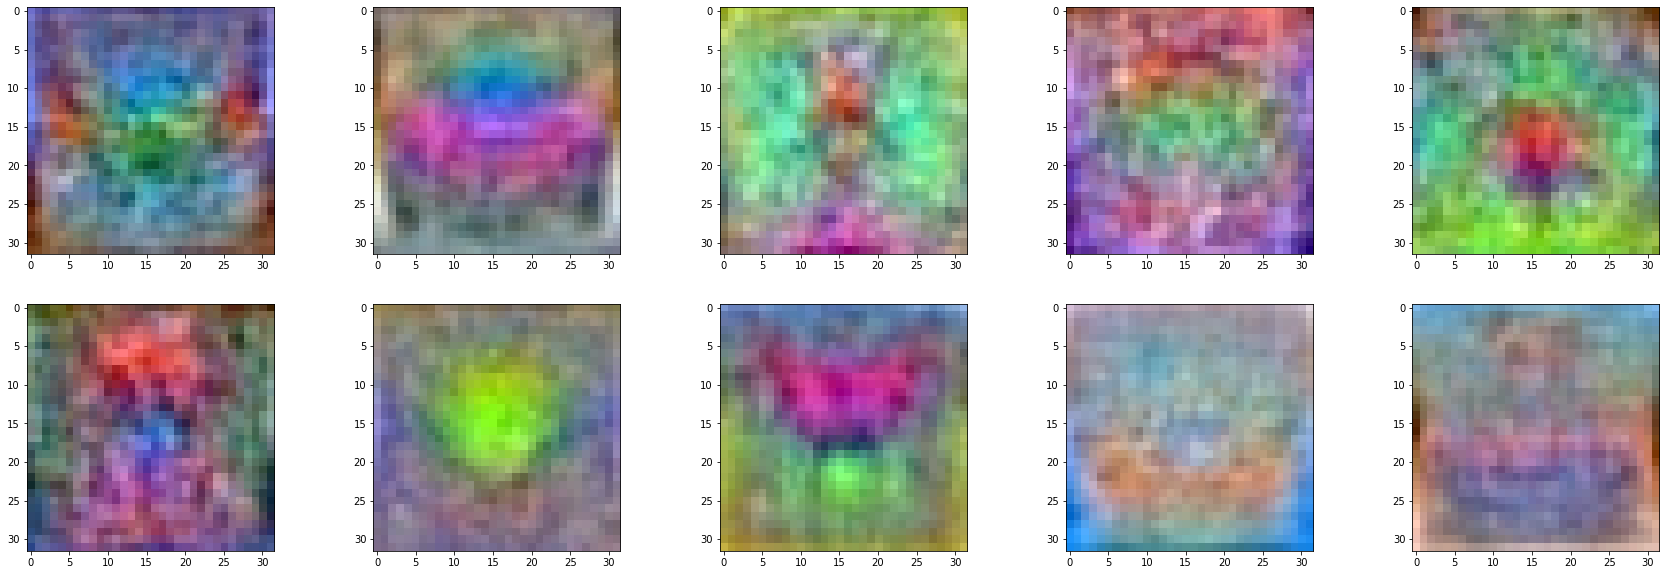

In [11]:
#Displaying w as 10 images
import cv2 as cv
images=[]
for i in range(w1.shape[1]):
    temp=np.reshape(w1[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
plt.show()

##### <html><h><font color='purple'>Two Layer Fully Connected Network

In [28]:
H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [13]:
def sigmoid(x,w,b):
   return 1./(1.0 + np.exp(-(x.dot(w)+b))) 

In [27]:
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
seed = 0
#rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    #rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    z1=1./(1.0 + np.exp(-(x.dot(w1)+b1)))
    y_pred=z1.dot(w2)+b2
    z=1./(1.0 + np.exp(-(x_test.dot(w1)+b1)))
    y_pred_test=z.dot(w2)+b2

    #loss
    loss=(1./batch_size)*np.square(y_pred-y).sum() + reg * np.sum(w1*w1) + reg * np.sum(w2*w2)
    test_loss=1./Nte*(np.square(y_pred_test-y_test)).sum() + reg * np.sum(w1*w1) + reg * np.sum(w2*w2)
    train_loss_history.append(loss)
    test_loss_history.append(test_loss)

    #accuracy
    train_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    test_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum()
    test_acc_history.append(test_acc)

    if t%10==0:
        print('epoch %d/%d: train loss= %f-- ,test loss= %f--,train accuracy= %f--, test accuracy= %f' % (t,iterations,loss,test_loss,train_acc,test_acc))

        
    # Backward pass

    dy_pred=(1./batch_size)*2.0*(y_pred-y)
    dw2=z1.T.dot(dy_pred) + reg * w2
    db2=dy_pred.sum(axis=0)
    dz1=dy_pred.dot(w2.T)
    dw1=x.T.dot(dz1*z1*(1-z1))+reg*w1
    db1=(dz1*z1*(1-z1)).sum(axis=0)


    
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay






epoch 0/300: train loss= 0.899999-- ,test loss= 0.900059--,train accuracy= 0.631648--, test accuracy= 0.630000


KeyboardInterrupt: 

Stochastic Gradient Descent on Fully Connected Two Layer Network

In [15]:
batch_size = 500
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []
seed = 0
#rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    #rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    z1=sigmoid(x,w1,b1)
    y_pred=z1.dot(w2)+b2
    z=sigmoid(x_test,w1,b1)
    y_pred_test=z.dot(w2)+b2

    #loss
    loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1) + reg * np.sum(w2*w2)
    test_loss=1./Nte*(np.square(y_pred_test-y_test)).sum() + reg * np.sum(w1*w1) + reg * np.sum(w2*w2)
    train_loss_history.append(loss)
    test_loss_history.append(test_loss)

    #accuracy
    train_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    test_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum()
    test_acc_history.append(test_acc)

    if t%10==0:
        print('epoch %d/%d: train loss= %f-- ,test loss= %f--,train accuracy= %f--, test accuracy= %f' % (t,iterations,loss,test_loss,train_acc,test_acc))

        
    # Backward pass

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=z1.T.dot(dy_pred) + reg * w2
    db2=dy_pred.sum(axis=0)
    dz1=dy_pred.dot(w2.T)
    dw1=x.T.dot(dz1*z1*(1-z1))+reg*w1
    db1=(dz1*z1*(1-z1)).sum(axis=0)


    
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    lr *= lr_decay






epoch 0/300: train loss= 0.900000-- ,test loss= 0.900000--,train accuracy= 0.701200--, test accuracy= 0.699880
epoch 10/300: train loss= 0.902594-- ,test loss= 0.903078--,train accuracy= 0.545400--, test accuracy= 0.550000
epoch 20/300: train loss= 0.903515-- ,test loss= 0.904474--,train accuracy= 0.628000--, test accuracy= 0.630000
epoch 30/300: train loss= 0.901510-- ,test loss= 0.903089--,train accuracy= 0.742600--, test accuracy= 0.730000
epoch 40/300: train loss= 0.903788-- ,test loss= 0.902400--,train accuracy= 0.722400--, test accuracy= 0.730000
epoch 50/300: train loss= 0.904669-- ,test loss= 0.904913--,train accuracy= 0.533800--, test accuracy= 0.550000
epoch 60/300: train loss= 0.905436-- ,test loss= 0.903374--,train accuracy= 0.627200--, test accuracy= 0.630000
epoch 70/300: train loss= 0.906410-- ,test loss= 0.903920--,train accuracy= 0.744400--, test accuracy= 0.750000
epoch 80/300: train loss= 0.904055-- ,test loss= 0.903448--,train accuracy= 0.687800--, test accuracy= 0.

CNN

In [ ]:
model=models.Sequential()
model.add(layers.conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=3,batch_size=50,validation_data=(x_test,y_test))

fig,ax=plt.subplots(2,2,figsize=(30,10),sharex=True)
ax[0,0].plot(history.history['accuracy'],label='training accuracy')
ax[0,1].plot(history.history['val_accuracy'],label='test accuracy')

ax[1,0].plot(history.history['loss'],label='training loss')
ax[1,1].plot(history.history['val_loss'],label='test loss')

ax[1,0].set_xlabel('epoch')
ax[1,1].set_xlabel('epoch')
